In [2]:
import pyart
import matplotlib.pyplot as plt

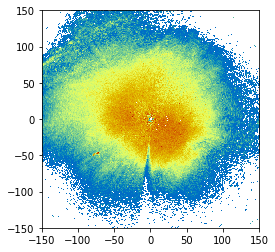

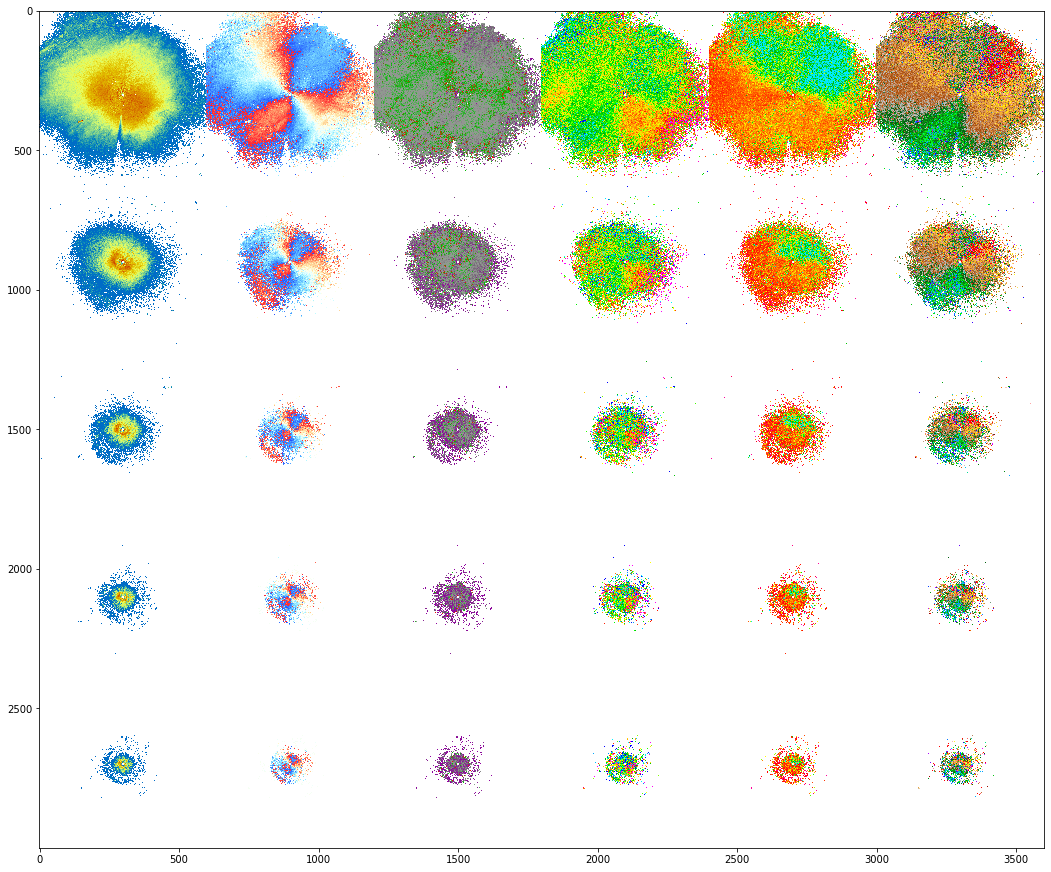

In [8]:
from wsrlib import read_s3, radar2mat, mosaic
from wsrlib.testing import DUALPOL_SCAN

# Get radar from s3 and read into 
radar = pyart.io.read_nexrad_archive(DUALPOL_SCAN)

# Or read from s3 (free, but needs credentials)
# radar = read_s3('KBGM20100911_012056_V03')

# Convert radar to 4d array
data, fields, elev, y, x = radar2mat(radar,
                                     coords='cartesian', 
                                     dim=600, 
                                     r_max=150000)

# View one sweep: reflectivity at lowest elevation
plt.imshow(data[0,0,:,:],
           extent = (x[0]/1000, x[-1]/1000, y[0]/1000, y[-1]/1000),
           origin='lower', 
           vmin=-5, vmax=35,
           cmap=pyart.config.get_field_colormap('reflectivity'))

# View whole volume scan as mosaic
mosaic_im = volume_mosaic(data, fields)
fig, ax = plt.subplots(figsize=(len(fields)*3, len(elev)*3))
ax.imshow(mosaic_im)